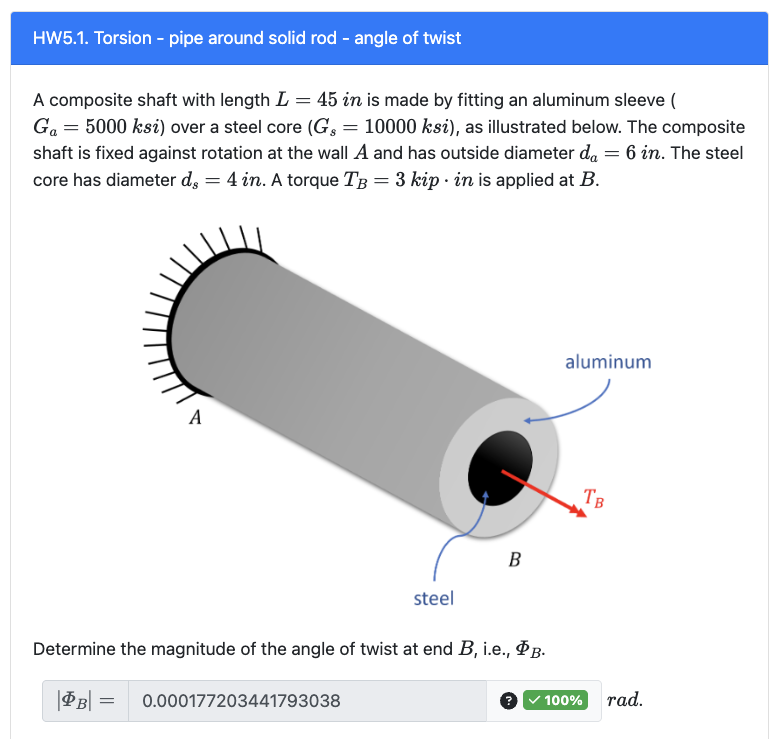

In [45]:
# 5.1
# 思路
# 剪切系数需要是k1+k2 f所以除掉的应该是sum(j*G)

from sympy import *

l=45
Ga=5000e3
Gs=10000e3
da=6
ds=4
tb=3e3
#======================

def j(d):
    return pi/2*(d/2)**4

ja=j(da)-j(ds)
js=j(ds)

fai=tb*l/(ja*Ga+js*Gs)

print(fai.evalf())

0.000177203441793038


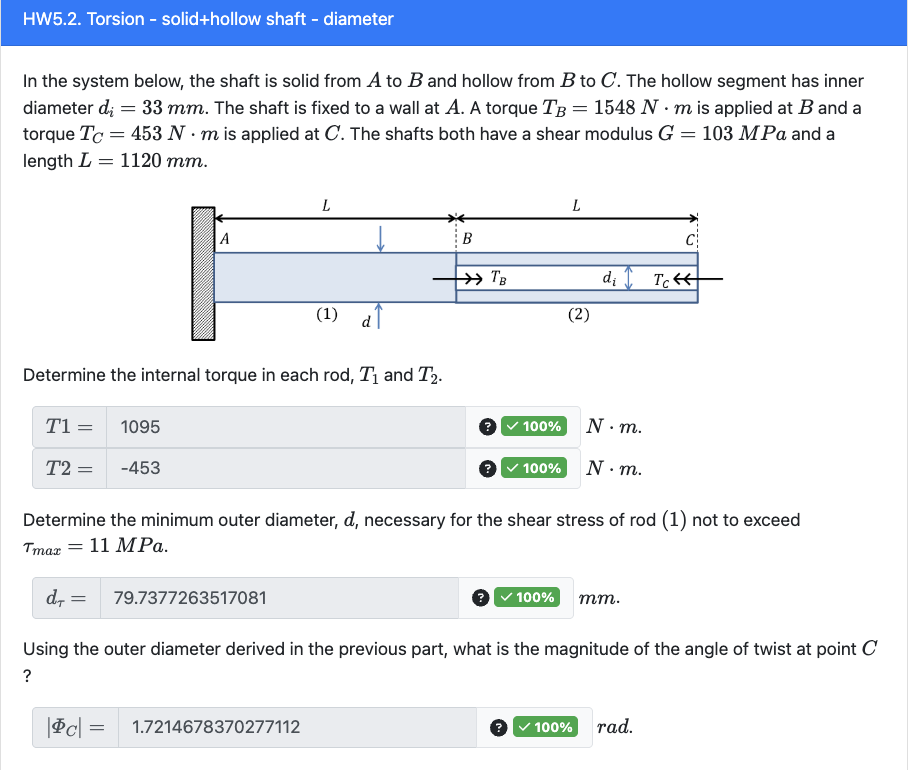

In [46]:
# 5.2
# 思路
# 第一问左边给的力是向左tb-tc，l1上收到的力是向右边的tb-tc为力平衡，l2受到的力向左tc，也就是-tc
# 第二问tao已知 taom=t1*d1/2/j1
# 第三问fai=t1*d1/2/j1+t2*d2/2/j2 负的直接正号就行了

# 失误 一开始J没有/16直接用的d**4
# 失误 一开始没有看清是等于taom，自以为是不伸长，gamma1+gamma2=0


from sympy import *
tb=1548
tc=453
d1=33e-3
l1=1120e-3
l2=l1
G=103e6
taom=11e6
# =====================================


t1=tb-tc
t2=-tc
print(t1,t2)

d=S('d')
j1=pi/2*d**4/16
j2=pi/2*(d**4-d1**4)/16
q1=t1*d/2/j1-taom
d=solve(q1,d)[0]
print(d*1e3)


j1=pi/2*d**4/16
j2=pi/2*(d**4-d1**4)/16
fai=t1*l1/G/j1+t2*l2/G/j2
print(float(fai))



1095 -453
79.7377263517081
1.7214678370277112


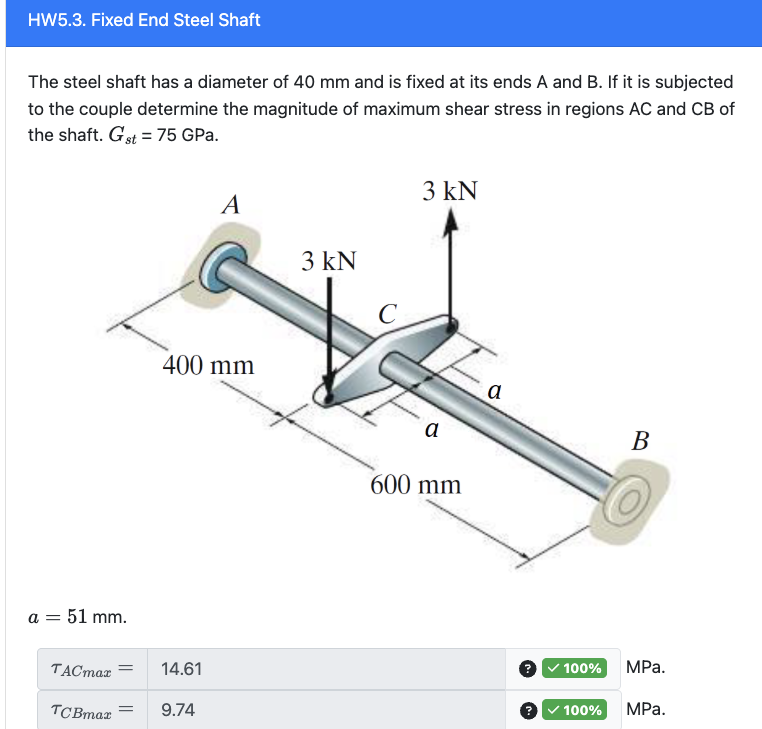

In [47]:
# 5.3
# 思路
# 设左右给的torque，ta tb，然后对ac ab段分析torque
# 两个等式 第一个是两个部分的fai相加为0，第二个是总torque为0 
# 算出来ta tb用公式得到taoa taob

# 经验 感觉思路没问题 答案不对 大概率是某处的正负号错了，都试一试

d=40e-3
Gst=75e9
a=51e-3
# ===========


j=pi/2*(d/2)**4
tc=3e3*a*2

ta=S('ta')
tb=S('tb')

fai1=-ta*400e-3/Gst/j
fai2=(-ta-tc)*600e-3/Gst/j

q1=fai1+fai2
q2=ta+tc+tb

an=solve([q1,q2],[ta,tb])
ta=an[ta]
tb=an[tb]

taoa=(-ta)*(d/2)/j
print(float(taoa)/1e6)
taob=(tb)*(d/2)/j
print(-float(taob)/1e6)


14.61042377583599
9.740282517223996


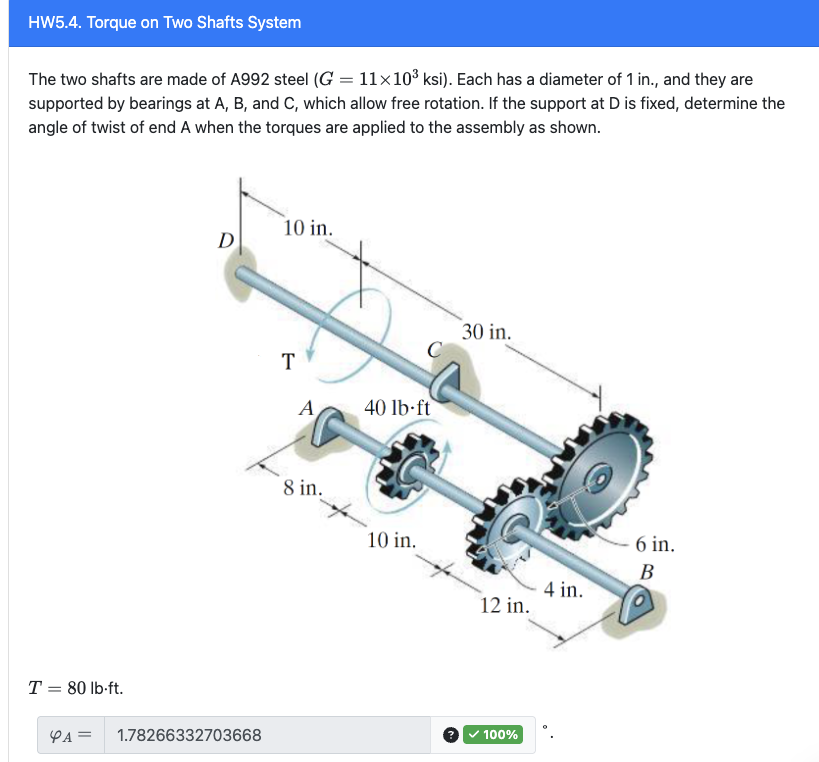

In [48]:
# 5.4
# 思路 
# 正常三步 先计算每个杆子上的torque，然后计算每个杆子的fai，最后汇总为一个fai
# 本题思路 先算faie 然后faib因为灵活转动 就等于faie
# 单位 1 ft=12 in
# md不是很懂 ！！！！！！！


G=11e6
t1=71 # lb*ft
d=1

t2=40 # lb*ft
r1=6
r2=4

l1=40
l2=8
l3=10
l4=12

j=pi/2*(d/2)**4
t21=-t1/r1*r2

# 单位 1 ft=12 in
fai1=((-60)*12*30+(t1-60)*12*10)/G/j
fai2=(-(40)*10*12)/G/j

# print(fai2.evalf())

fai=fai1*r1/r2+fai2
fai=fai*180/pi

print(-fai.evalf())





1.86861316601881


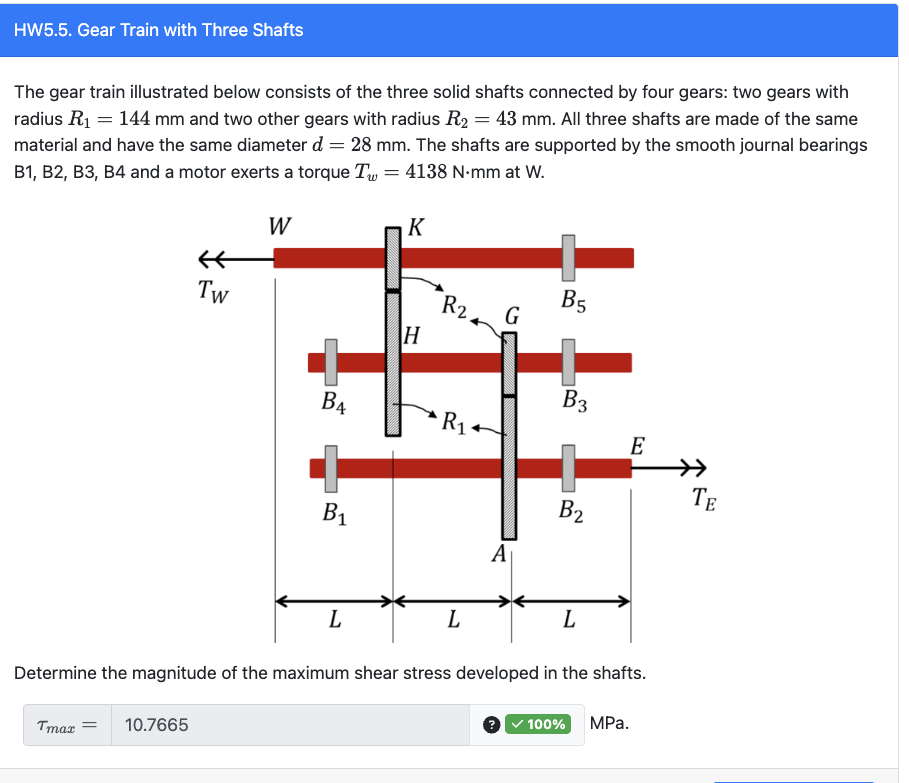

In [49]:
# 5.5
# 思路

r1 = 128e-3 
r2 = 44e-3 
d = 28e-3 
tw = 4138e-3 
##########################复制内容

r=d/2

def j(r):
    return pi/32*(2*r)**4
j=j(d/2)

t3=tw*(r1/r2)*(r1/r2)

float(t3*r/j/1000000)

8.124583165344735

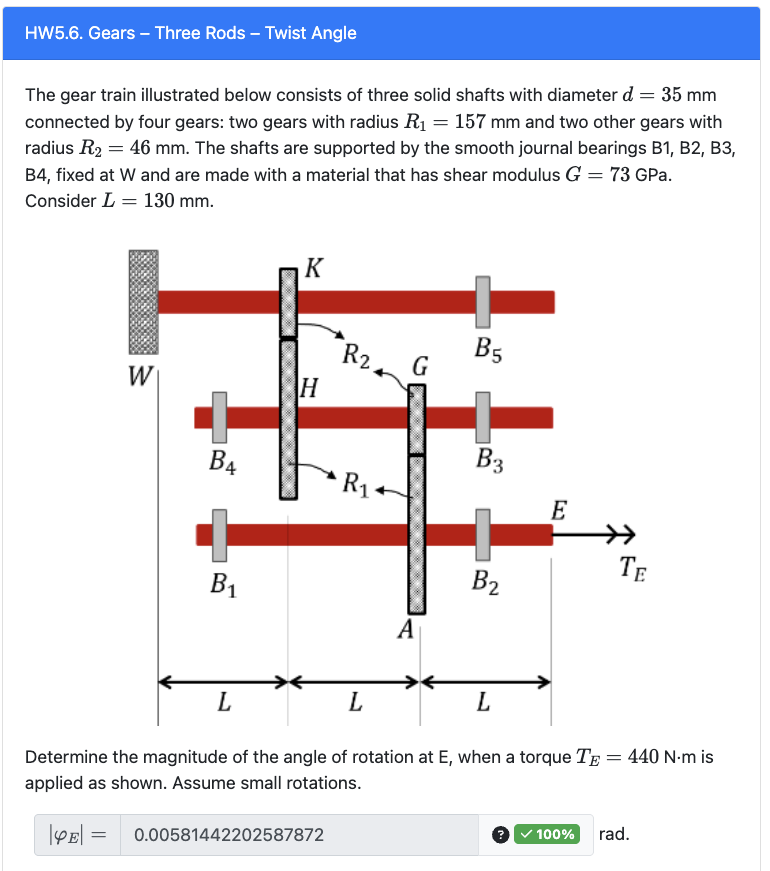

In [50]:
# 5.6
# 思路
# Topque跟齿轮转数正比 所以t2=t1/r1*r2 t3=t2/r1*r2
# fai跟齿轮转数反比 所以fai2=fai2*r2/r1 fai3=fai3*(r2/r1)**2

d = 35e-3 
r1 = 157e-3 
r2 = 46e-3 
G = 73e9
l = 130e-3
te = 440
from sympy import *
#====================================


def j(r):
    return pi/32*(2*r)**4
r=d/2
j=j(r)

t1=te
t2=t1/r1*r2
t3=t2/r1*r2

fai1=t1*l/G/j
fai2=t2*l/G/j
fai3=t3*l/G/j

delta=fai1+fai2*(r2/r1)+fai3*(r2/r1)**2
delta.evalf()



0.00581442202587872

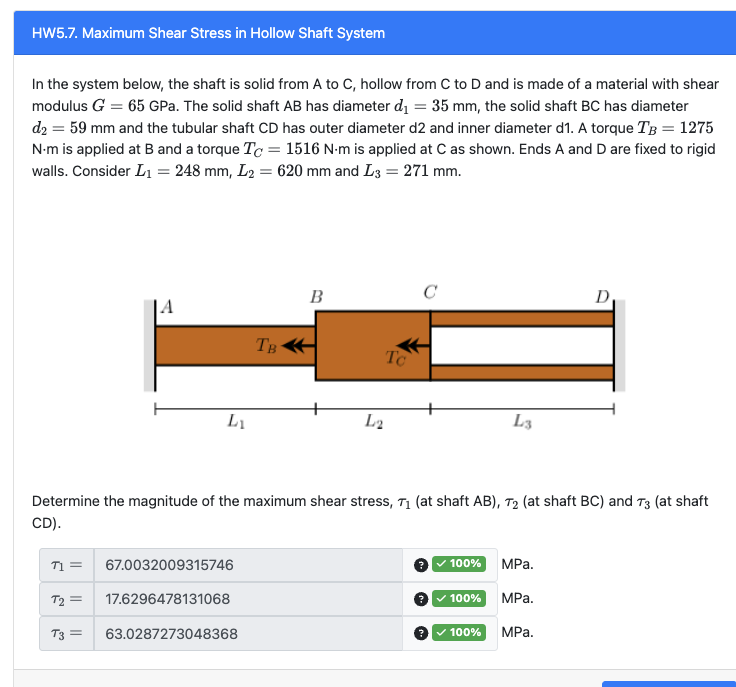

In [51]:
# 5.7
# 思路
# 两头都产生扭矩torque
# 三个公式，一个是角度fai的，一个是应力tao的(要一段段分析Torque)
# 一个是torqe相加为0

l1 = 248e-3 
l2 = 620e-3 
l3 = 271e-3
d1 = 35e-3
d2 = 59e-3 
G = 65e9
tb = 1275 
tc = 1516

##########################

ta,td=S('ta,td')

def j(r):
    return pi/32*(2*r)**4

j1=j(d1/2)
j2=j(d2/2)
j3=j2-j1

r1=d1/2
r2=d2/2
r3=d2/2

equ1=ta-tb-tc+td 

theta1=-(ta)*l1/G/j1
theta2=(tb-ta)*l2/G/j2
theta3=(-ta+tb+tc)*l3/G/j3
equ2=theta1+theta2+theta3

ans=solve([equ1,equ2],[ta,td])
ta=ans[ta]
td=ans[td]

tao1=(ta)*r1/j1/1000000
tao2=(tb-ta)*r2/j2/1000000
tao3=(-ta+tb+tc)*r3/j3/1000000

print('AB',abs(tao1).evalf())
print('BC',abs(tao2).evalf())
print('CD',abs(tao3).evalf())

AB 67.0032009315746
BC 17.6296478131068
CD 63.0287273048368


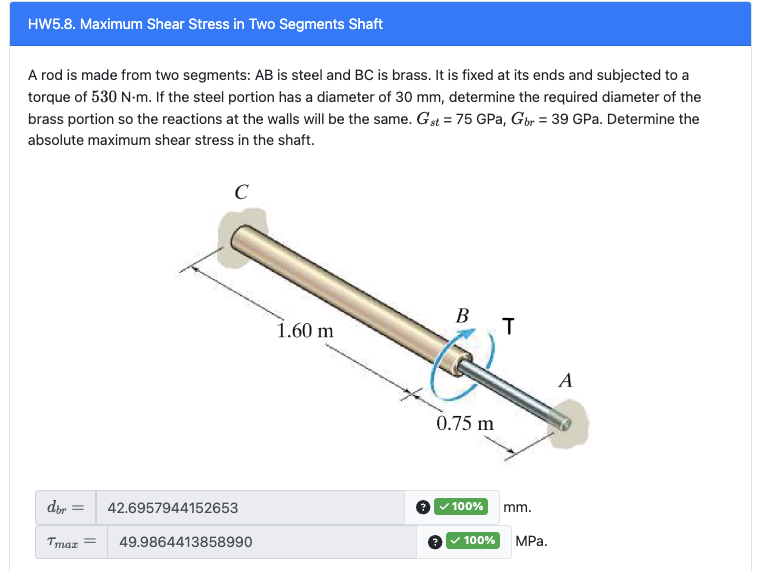

In [52]:
# 5.8
# 题意 这个same reaction就是same torque所以直接得到两个端点torque 
# 等式就是fai=0
# 之后有一个失误是 j(d1)忘记在得到d1之后重新定义

tb=530
d2=30e-3
Gst=75e9
Gbr=39e9
l1=1.6
l2=0.75

# ===============
d1,tc,ta=S('d1,tc,ta')
G1=Gbr
G2=Gst

def j(r):
    return pi/2*r**4
j1=j(d1/2)
j2=j(d2/2)

fai1=(-tb/2)*l1/j1/G1
fai2=(tb/2)*l2/j2/G2
q1=fai1+fai2
an=solve([q1],[d1])[0]
d1=an[0]
print(-d1*1e3)
j1=j(d1/2)
tao1=tb/2*d1/2/j1
print(-tao1.evalf()/1e6)
tao2=tb/2*d2/2/j2
print(tao2.evalf()/1e6)

42.6957944152653
17.3404629528247
49.9864413858990


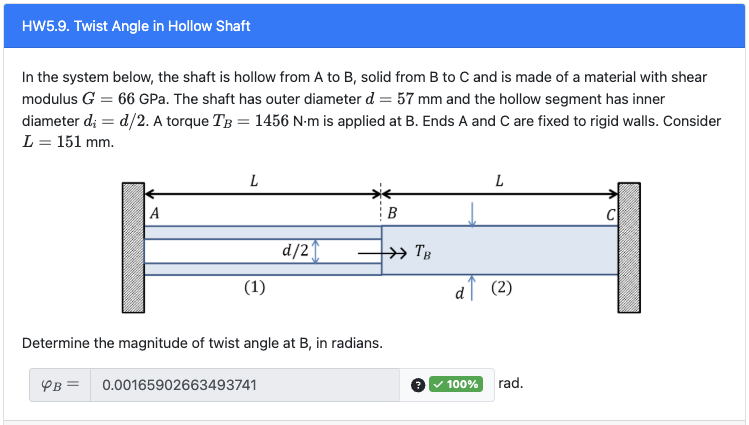

In [53]:
# 5.9
# 思路
# 通过fai1+fai2=0 得到ta，然后用ta计算fai1

G=66e9
do=57e-3
di=do/2
tb=1456
l=151e-3


ta=S('ta')
def j(r):
    return pi/2*r**4

j1=j(do/2)-j(di/2)
j2=j(do/2)

fai1=-ta*l/G/j1
fai2=(-ta-tb)*l/G/j2
q1=fai1+fai2

ta=solve(q1,ta)[0]
fai1=-ta*l/G/j1
print(fai1.evalf())


0.00165902663493741


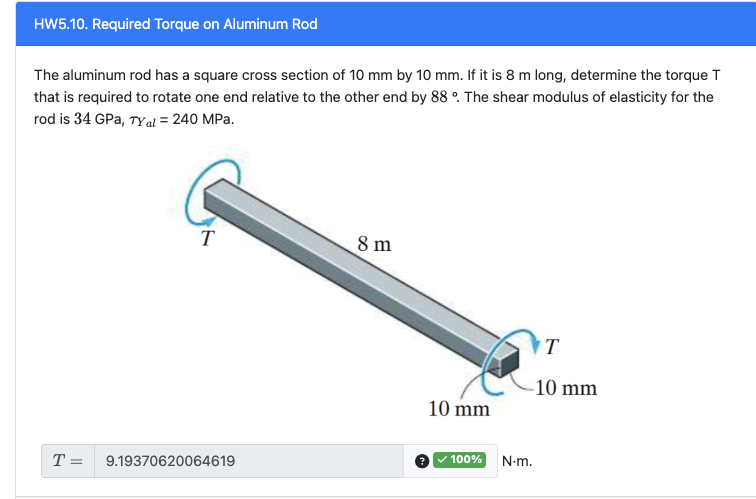

In [54]:
# 5.10
# 思路
# 公式fai=7.10*T*L/(a**4*G)
# tao=4.81*T/a**3

l=8
a=0.01
G=34e9
# tao=240e6
fai=88
# =======


fai=fai/180*pi

T=fai*a**4*G/7.10/l
print(T.evalf())
# tao=4.81*T/a**3
# print(tao.evalf()/1e6)

9.19370620064619
